# 27th of June, 2018
## Benjamin Adam Catching
## Andino Lab Rotation
## Poliovirus DIP Project

Test data has been received, generously sent from Christian from the Abate lab. Three image files are included; brightfield, GFP, and Cy5. Cy5 reports cell tracker dye that is diffuse through the cell cytoplasm and the GFP reports nuclear intercalating dye called Sytox. Sytox only permeates dead cells, so the cells displaying both Cy5 and GFP are dead.  

This image dataset will be useful to practice creating a pipeline that can:  
1. Identify wells  
2. Identify cells in each well  
3. Sort cells into live (Cy5) and dead (GFP). Quantifying this data will be useful for virus infection.  

In [1]:
# Import packages

# Data modification
import glob
import numpy as np

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import skimage.filters
import skimage.io
import skimage.morphology
import skimage.exposure
import skimage.color

sns.set(style='dark', palette=sns.color_palette(), rc={'axes.labelsize': 20}, font_scale=2)

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [48]:
# Define the location of the image files
wells_bright = "../data/test_data/10x_livedead-2_TRANS.tif"
wells_cy5 = "../data/test_data/10x_livedead-2_CY5.tif"
wells_gfp = "../data/test_data/10x_livedead-2_GFP.tif"

In [49]:
# Read in the images
image_bright = skimage.io.imread(wells_bright)
image_cy5 = skimage.io.imread(wells_cy5)
image_gfp = skimage.io.imread(wells_gfp)

In [50]:
# Overlay the images
image_overlay = np.dstack(3 * [image_bright / image_bright.max()])

image_overlay[image_gfp, 0] = 1.0
image_overlay[image_cy5, 1] = 1.0

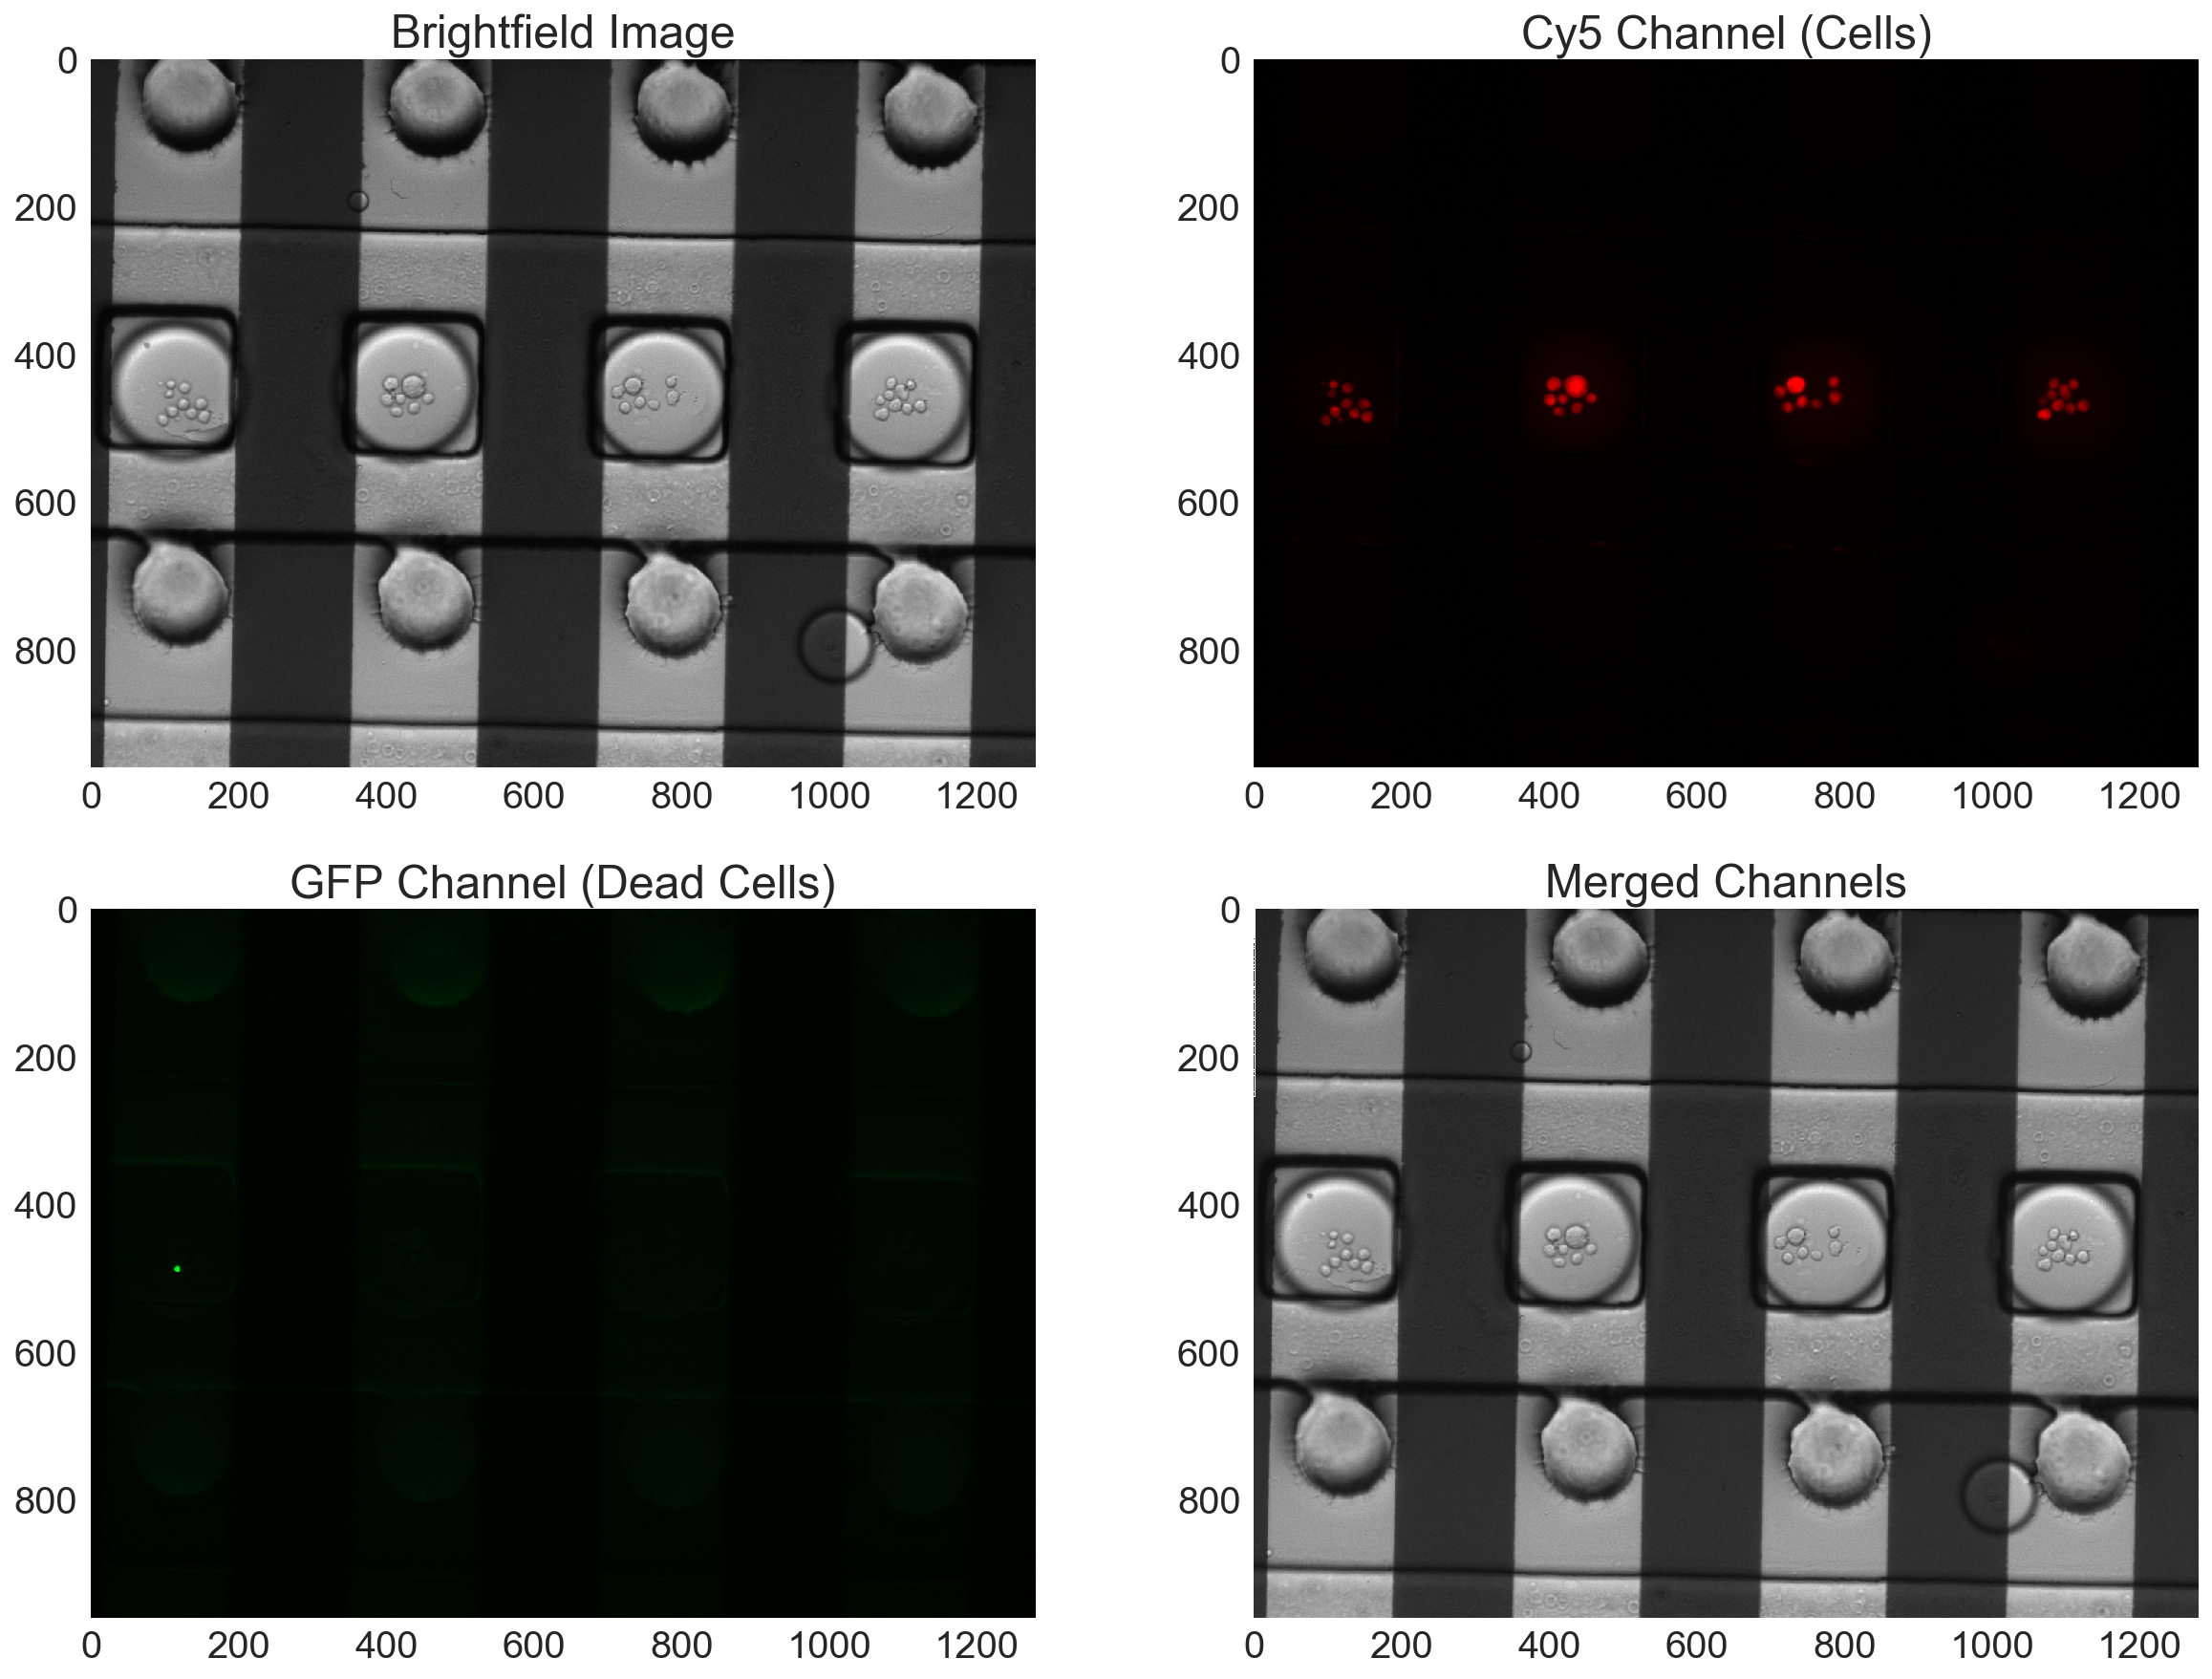

In [51]:
# Display the image, set Seaborn style 'dark' to avoid grid lines
with sns.axes_style('dark'):
    fig, ax = plt.subplots(2, 2, figsize=(20, 15))
    ax[0, 0].imshow(image_bright, cmap=plt.cm.gray)
    ax[0, 0].set_title('Brightfield Image')
    
    ax[0, 1].imshow(image_cy5)
    ax[0, 1].set_title('Cy5 Channel (Cells)')
    
    ax[1, 0].imshow(image_gfp)
    ax[1, 0].set_title('GFP Channel (Dead Cells)')
    
    ax[1, 1].imshow(image_overlay)
    ax[1, 1].set_title('Merged Channels')
plt.show()

The merged channel blocks the cy5 and rfp values, the values may need to be thresholded before merging.

In [52]:
# Create histograms of the two fluorescent channels
hist_cy5, bins_cy5 = skimage.exposure.histogram(image_cy5)
hist_gfp, bins_gfp = skimage.exposure.histogram(image_gfp)

/Users/adam/anaconda/lib/python3.6/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


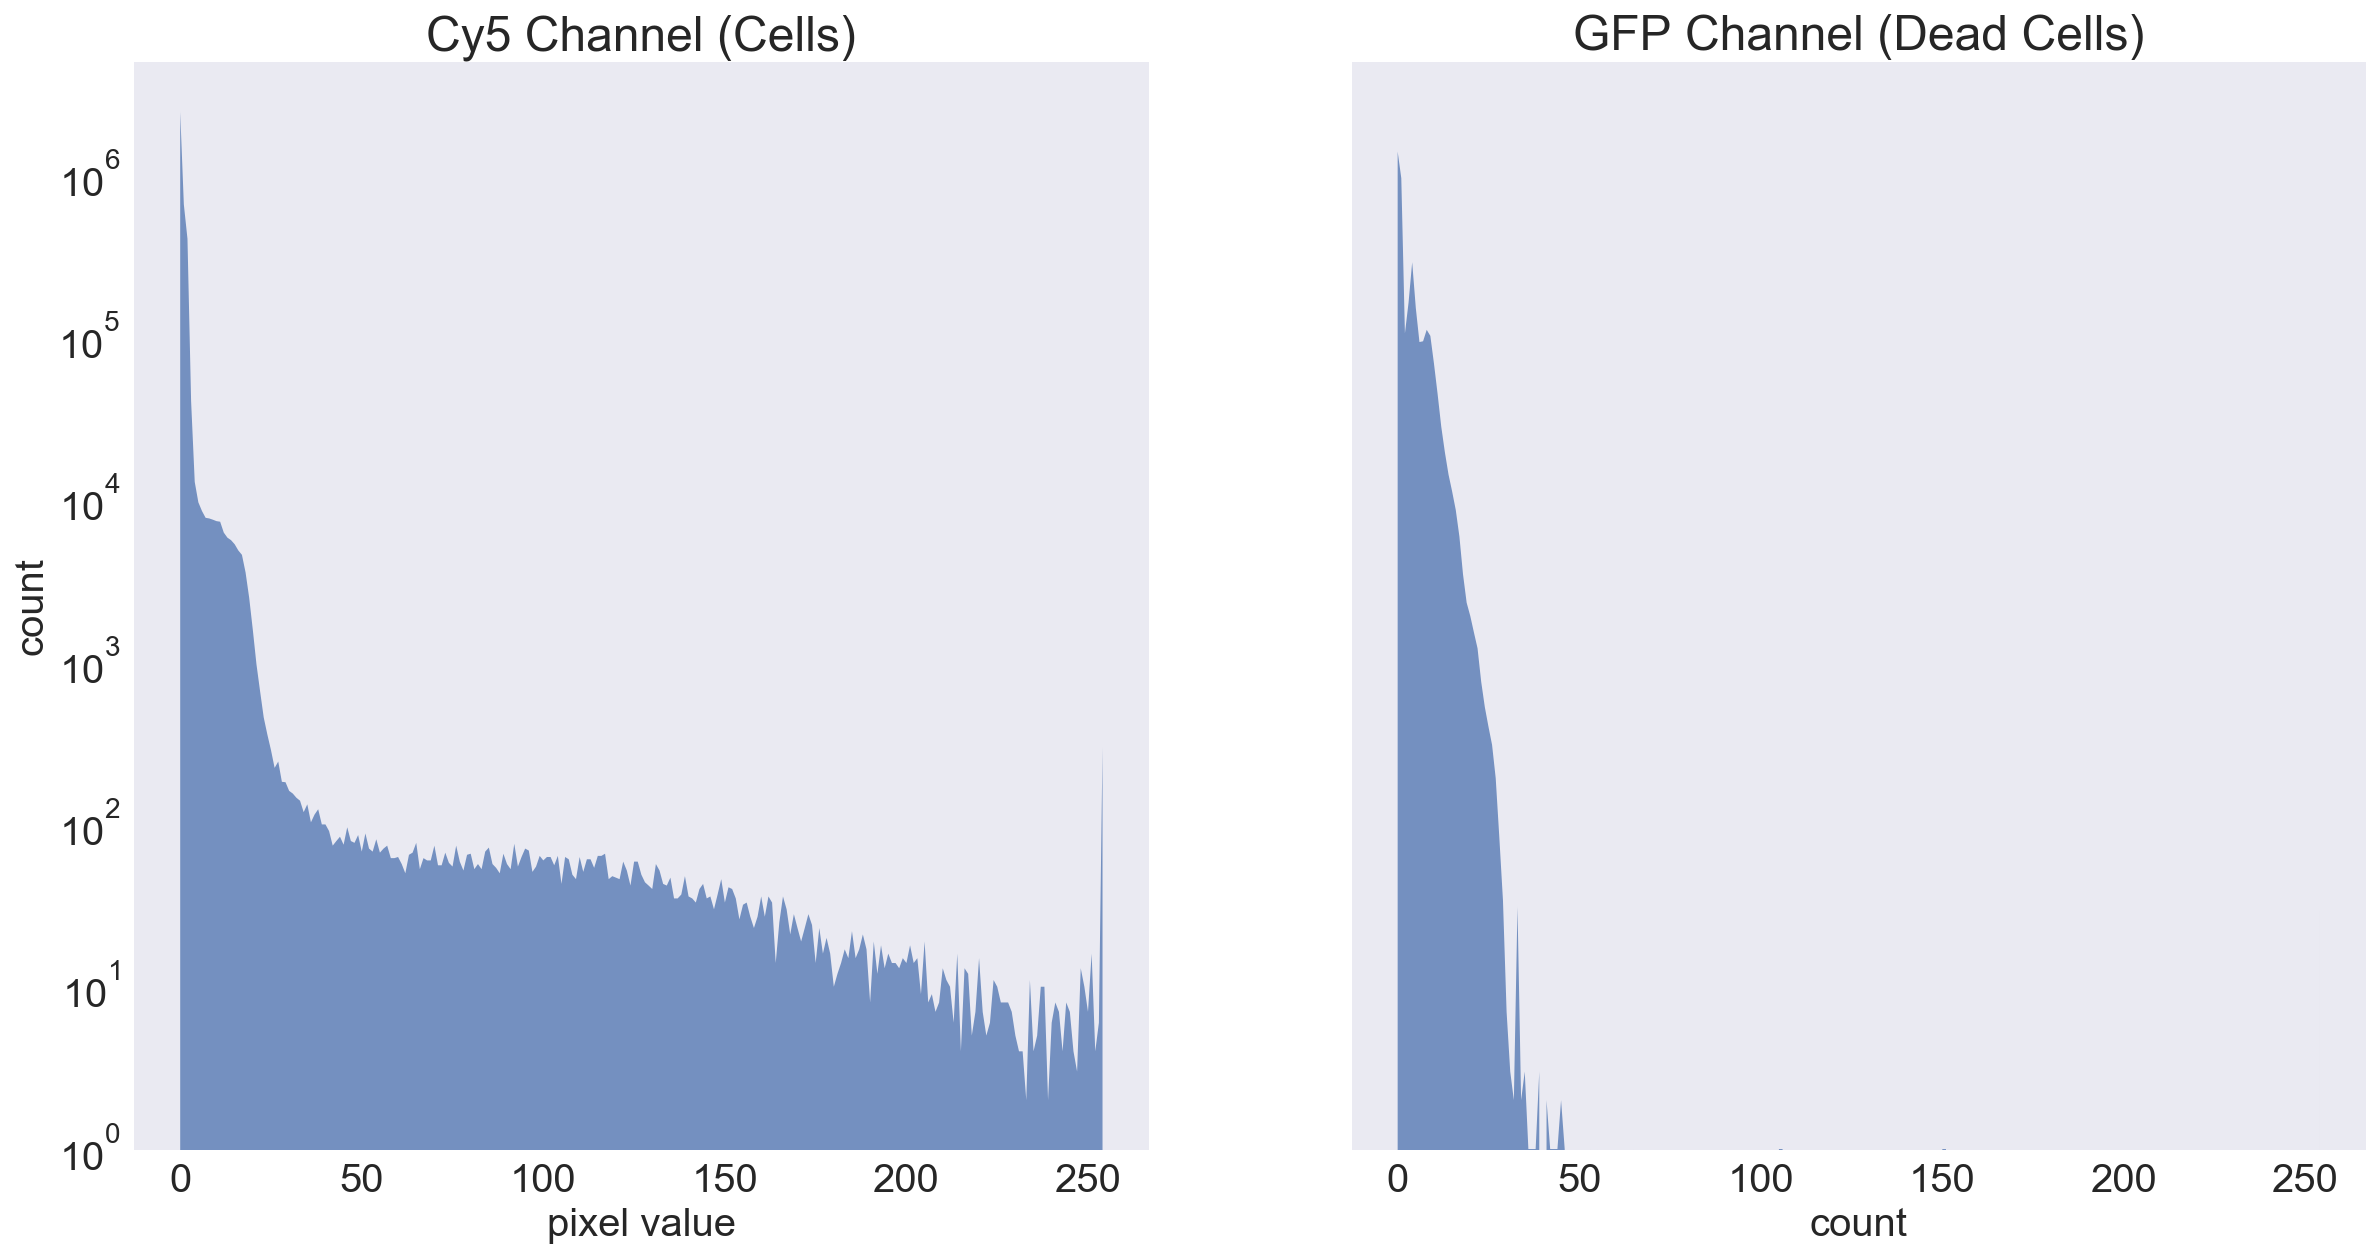

In [53]:
# Plot the histograms of the intensities
with sns.axes_style('dark'):
    # Multiple plots
    fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
    
    #Label axes
    ax[0].set_xlabel('pixel value')
    ax[0].set_ylabel('count')
    ax[1].set_xlabel('count')
    
    # Plot the histogram
    ax[0].fill_between(bins_cy5, hist_cy5, alpha=0.75)
    ax[1].fill_between(bins_gfp, hist_gfp, alpha=0.75)
    
    # Set titles
    ax[0].set_title('Cy5 Channel (Cells)')
    ax[1].set_title('GFP Channel (Dead Cells)')
    
    # Scale the pixel value counts by log-scale
    ax[0].set_yscale('log')
plt.show()

In [54]:
# Find the automated threshold above which are signal and below are not, using Otsu's method
thresh_cy5_otsu = skimage.filters.threshold_otsu(image_cy5)
thresh_gfp_otsu = skimage.filters.threshold_otsu(image_gfp)

/Users/adam/anaconda/lib/python3.6/site-packages/skimage/filters/thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (960, 1280, 3) looks like an RGB image
  warn(msg.format(image.shape))


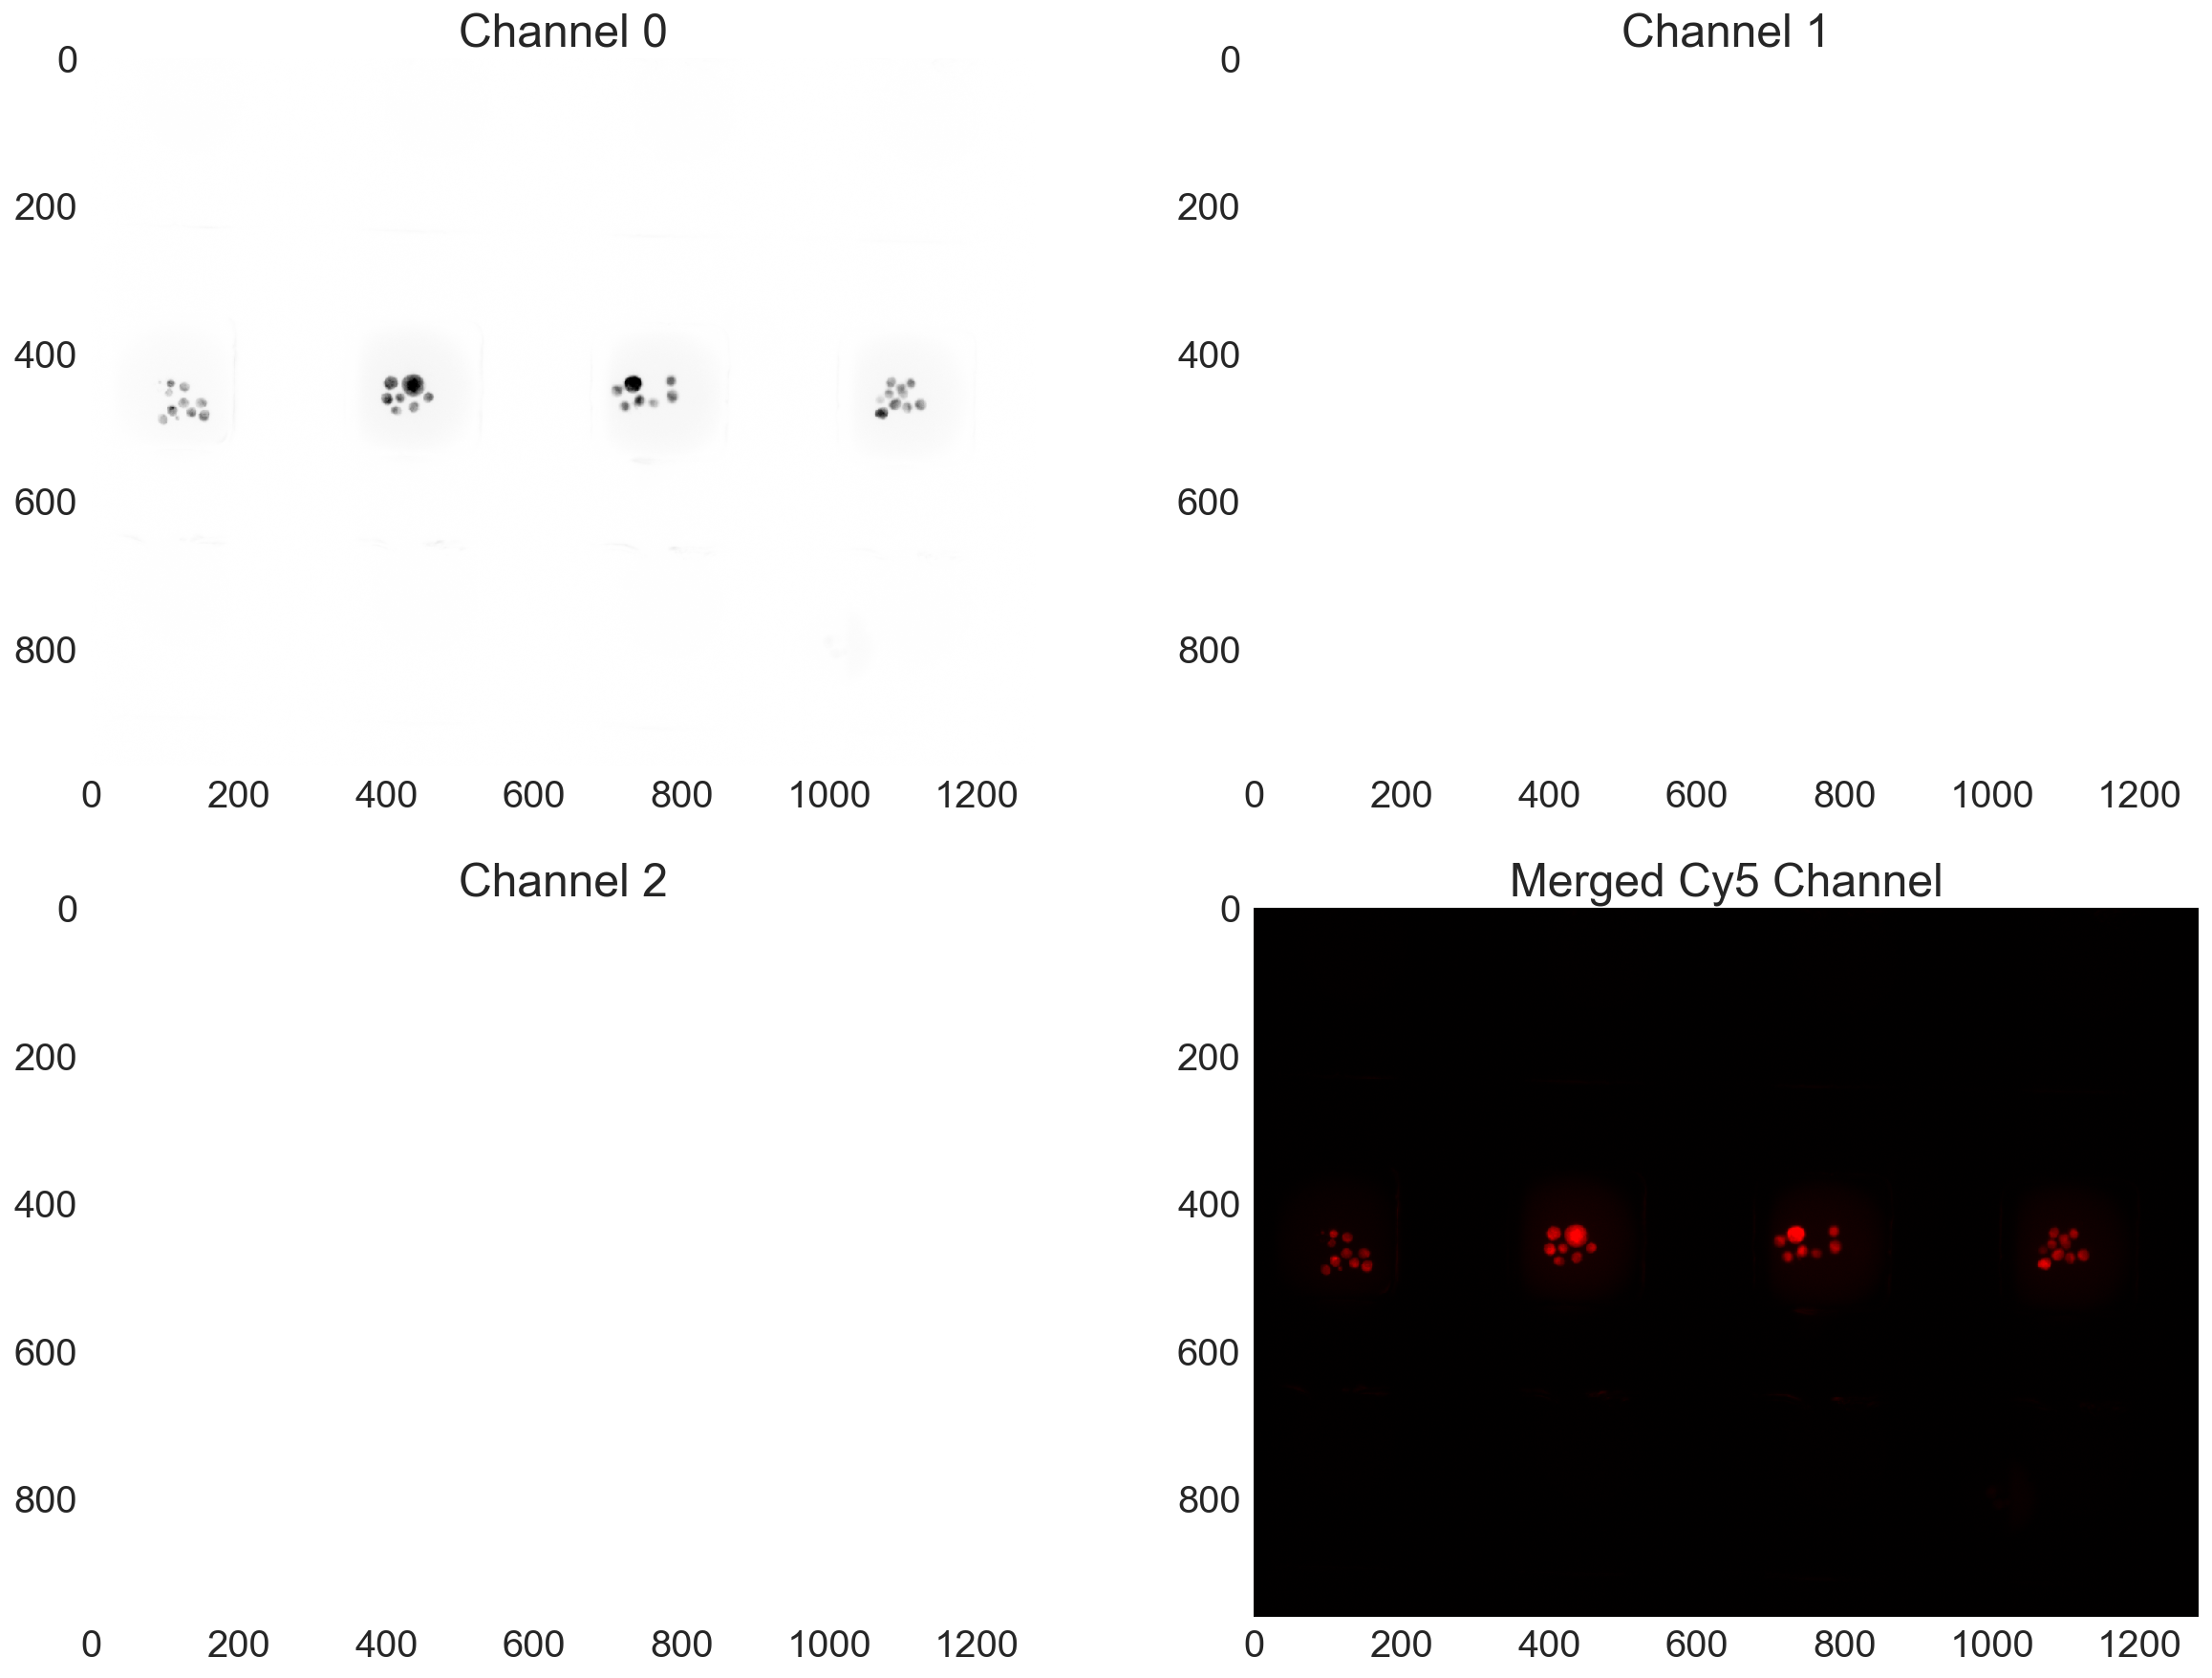

In [59]:
# The loaded in gfp and cy5 images appear to have multiple channels, test for isolating correct channel for cy5
with sns.axes_style('dark'):
    fig, ax = plt.subplots(2, 2, figsize=(20, 15))
    ax[0, 0].imshow(image_cy5[:, :, 0])
    ax[0, 0].set_title('Channel 0')
    
    ax[0, 1].imshow(image_cy5[:, :, 1])
    ax[0, 1].set_title('Channel 1')
    
    ax[1, 0].imshow(image_cy5[:, :, 2])
    ax[1, 0].set_title('Channel 2')
    
    ax[1, 1].imshow(image_cy5)
    ax[1, 1].set_title('Merged Cy5 Channel')

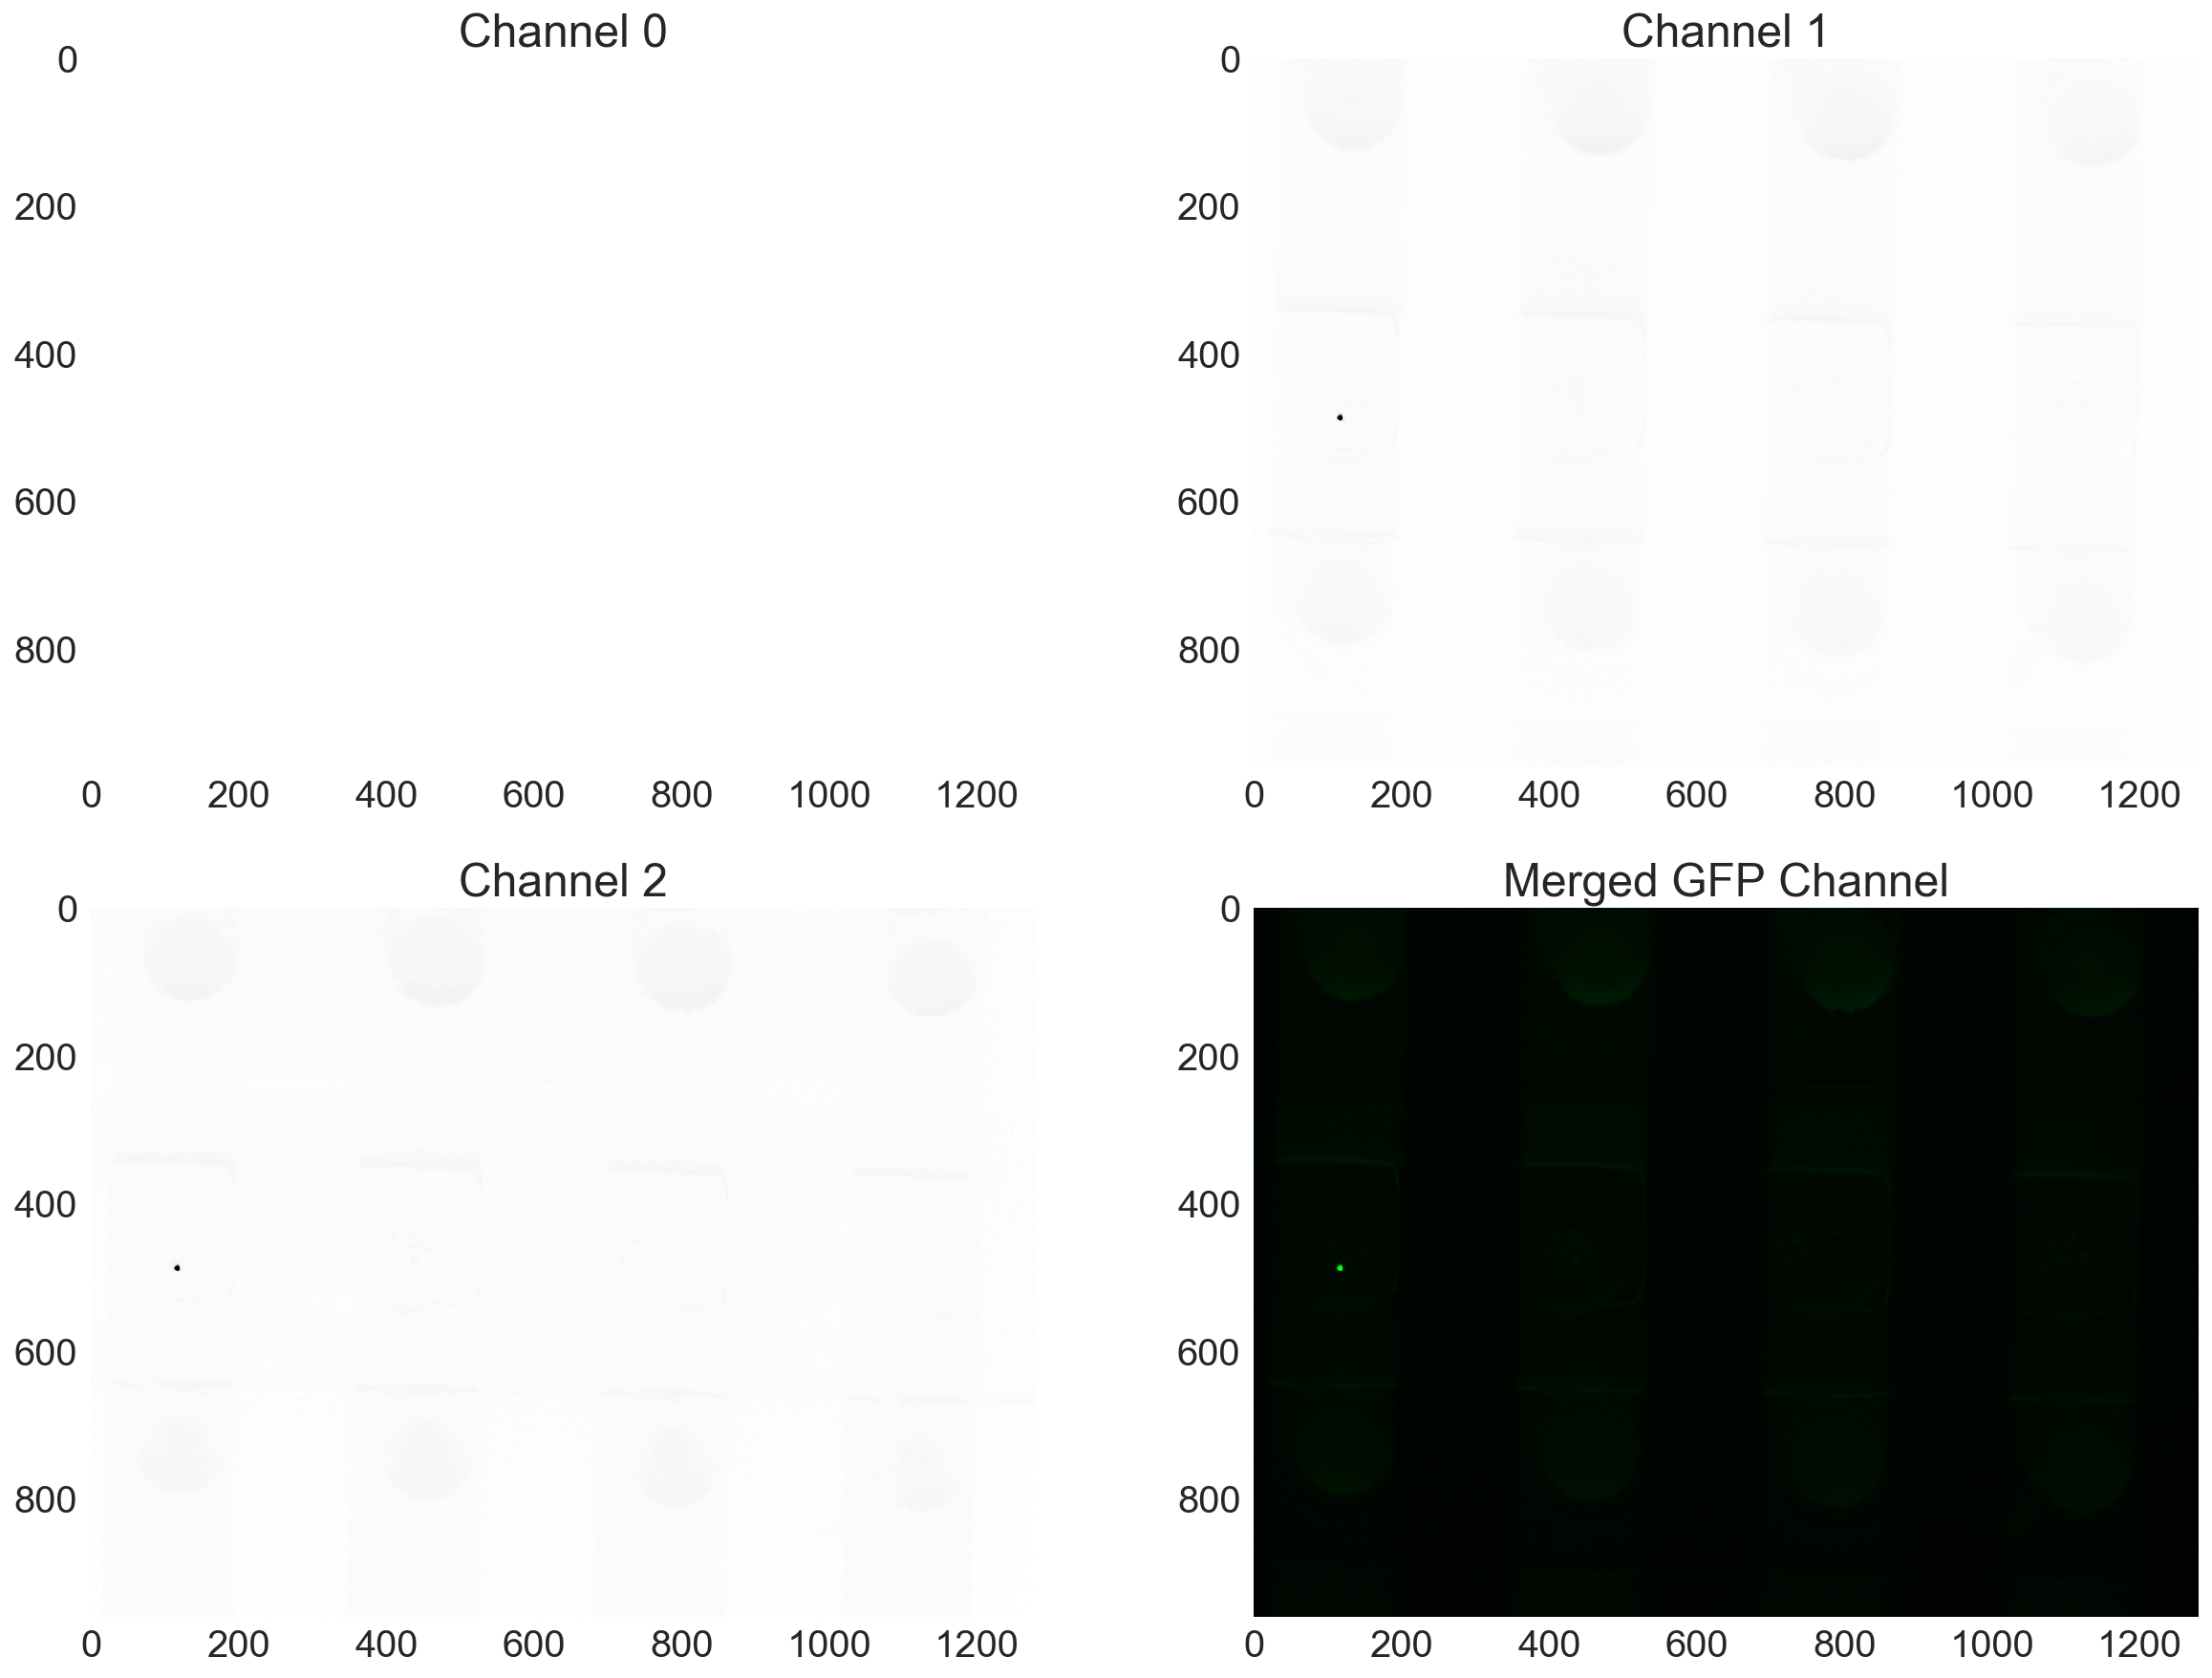

In [60]:
# The loaded in gfp and cy5 images appear to have multiple channels, test for isolating correct channel for gfp
with sns.axes_style('dark'):
    fig, ax = plt.subplots(2, 2, figsize=(20, 15))
    ax[0, 0].imshow(image_gfp[:, :, 0])
    ax[0, 0].set_title('Channel 0')
    
    ax[0, 1].imshow(image_gfp[:, :, 1])
    ax[0, 1].set_title('Channel 1')
    
    ax[1, 0].imshow(image_gfp[:, :, 2])
    ax[1, 0].set_title('Channel 2')
    
    ax[1, 1].imshow(image_gfp)
    ax[1, 1].set_title('Merged GFP Channel')

**Conclusion**: Cy5 is only in the red channel of the .tif stack (channel 0) and the GFP is in the green channel and the blue channel. See if the green channel is sufficent to report the intensity.

In [73]:
# Create overlayed image using appropriate channels
image_overlay = np.dstack(3 * [image_bright / image_bright.max()])


image_overlay[image_gfp[:, :, 2] > 25, 2] = 1.0
image_overlay[image_cy5[:, :, 0] > 40, 0] = 1.0

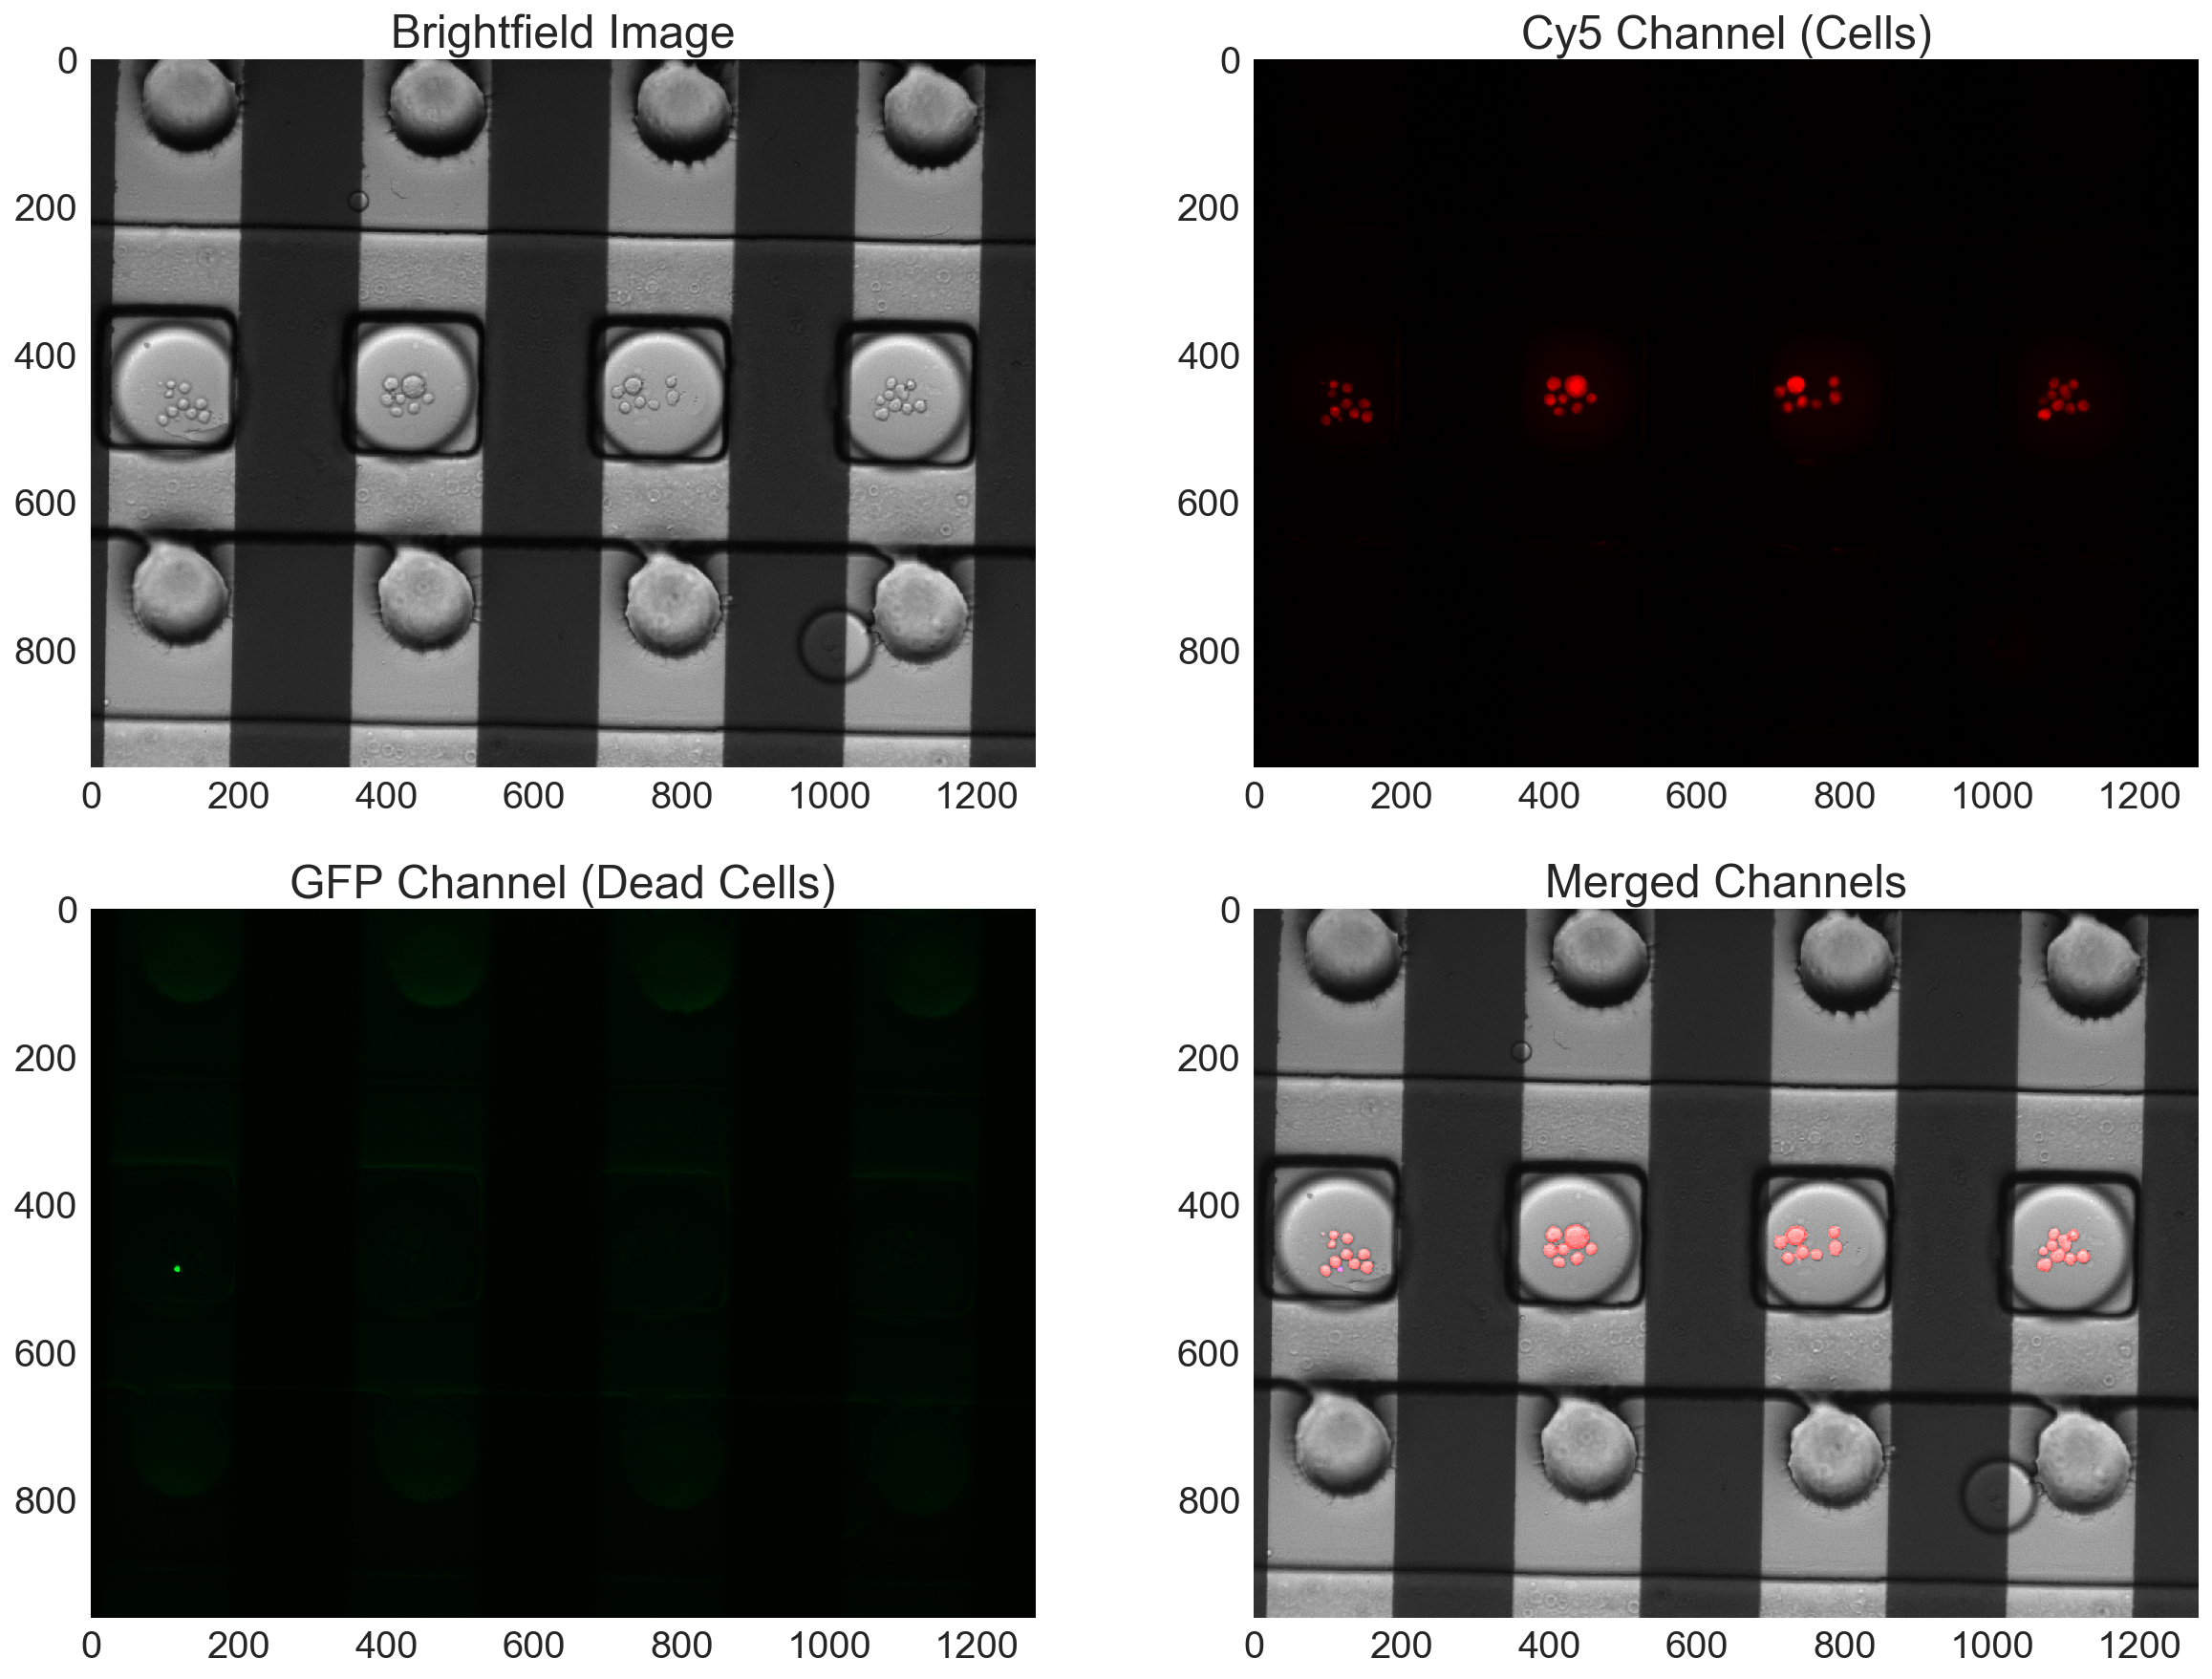

In [74]:
# Display the corrected merged image
with sns.axes_style('dark'):
    fig, ax = plt.subplots(2, 2, figsize=(20, 15))
    ax[0, 0].imshow(image_bright, cmap=plt.cm.gray)
    ax[0, 0].set_title('Brightfield Image')
    
    ax[0, 1].imshow(image_cy5)
    ax[0, 1].set_title('Cy5 Channel (Cells)')
    
    ax[1, 0].imshow(image_gfp)
    ax[1, 0].set_title('GFP Channel (Dead Cells)')
    
    ax[1, 1].imshow(image_overlay)
    ax[1, 1].set_title('Merged Channels')
plt.show()